# Sky Brightness

In [32]:
# Check the version of MAF - the output should be version 2.4.2 or higher.
# 'unknown' means you're running from a git repo version,
# and have made changes to your local code

import lsst.sims.maf
lsst.sims.maf.__version__

'2.13.0.sims-59-g0a27faef'

In [33]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# import our python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

# Config

In [35]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
colors = {'u': 'cyan', 'g': 'g', 'r': 'y','i': 'r', 'z': 'm', 'y': 'k'}
Nfilt=len(filters)

In [54]:
all_sqlconstraint=[]
all_bundlename=[]
for f in filters:
    sqlconstraint = 'filter = \"{}\"'.format(f)
    bundlename    = 'bund{}'.format(f) 
    all_sqlconstraint.append(sqlconstraint)
    all_bundlename.append(bundlename)

In [55]:
all_sqlconstraint

['filter = "u"',
 'filter = "g"',
 'filter = "r"',
 'filter = "i"',
 'filter = "z"',
 'filter = "y"']

In [56]:
all_bundlename

['bundu', 'bundg', 'bundr', 'bundi', 'bundz', 'bundy']

# Simu data

In [57]:
# Note the V3 for opening opsim version 3.x databases.
# Use V4 for more recent runs.

#opsdb = db.OpsimDatabase('baseline2018a.db')
opsdb = db.OpsimDatabase('/Users/dagoret/DATA/Cadence/baseline2018a.db')
outDir = 'output_skybrightness'
resultsDb = db.ResultsDb(outDir=outDir)

# Metrics

In [58]:
# metric = the "maximum" of the "skybrightness" for each group of visits in the slicer
metric1 = metrics.AbsMeanMetric('skyBrightness')


# slicer = a grouping or subdivision of visits for the simulated survey
# based on their position on the sky (using a Healpix grid)
slicer1 = slicers.OneDSlicer(sliceColName='night', binsize=10)

# sqlconstraint = the sql query (or 'select') that selects all visits in r band
sqlconstraint = 'filter = "r"'

# MetricBundle = combination of the metric, slicer, and sqlconstraint
averSkyBrightness = metricBundles.MetricBundle(metric1, slicer1, sqlconstraint)

# Bundle

In [67]:
bundles = {}
for ifilt in np.arange(Nfilt):
    sqlconstraint = all_sqlconstraint[ifilt]
    bundlename    = all_bundlename[ifilt]

    bundles[bundlename] = metricBundles.MetricBundle(metric1, slicer1, sqlconstraint)
    print(bundles[bundlename].dbCols)

{'night', 'skyBrightness'}
{'night', 'skyBrightness'}
{'night', 'skyBrightness'}
{'night', 'skyBrightness'}
{'night', 'skyBrightness'}
{'night', 'skyBrightness'}


In [60]:
bgroup = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outDir, 
                                         resultsDb=resultsDb)

Querying database SummaryAllProps with constraint filter = "y" for columns ['night', 'skyBrightness']
Found 445157 visits
Running:  ['bundy']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" for columns ['night', 'skyBrightness']
Found 515172 visits
Running:  ['bundr']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "z" for columns ['night', 'skyBrightness']


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/slicers/oneDSlicer.py:74: UserWarning: Both binsize and bins have been set; Using binsize 10.000000 only.
  warnings.warn('Both binsize and bins have been set; Using binsize %f only.' %(self.binsize))


Found 486208 visits
Running:  ['bundz']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "g" for columns ['night', 'skyBrightness']
Found 234144 visits
Running:  ['bundg']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "i" for columns ['night', 'skyBrightness']
Found 514481 visits
Running:  ['bundi']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "u" for columns ['night', 'skyBrightness']
Found 177538 visits
Running:  ['bundu']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "y"" constraint now.
Plotting complete.
Plotting figures with "filter = "r"" constraint now.
Plotting complete.
Plotting figures with 

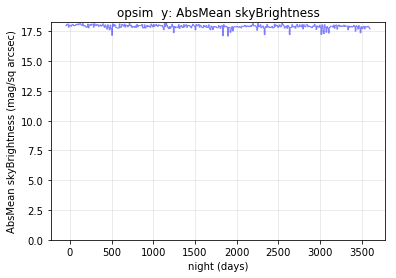

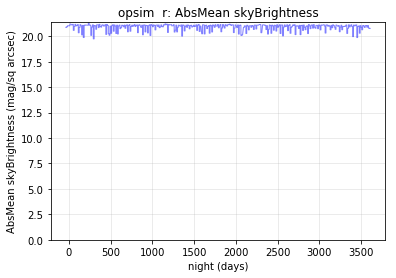

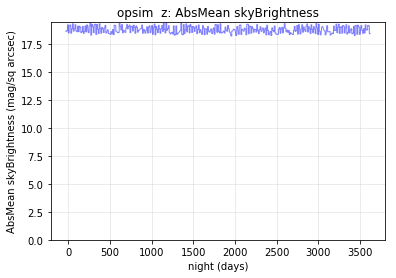

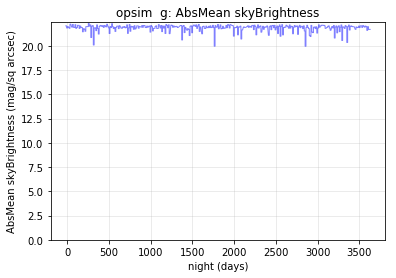

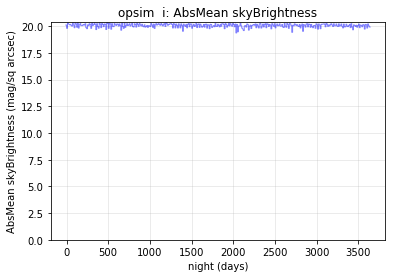

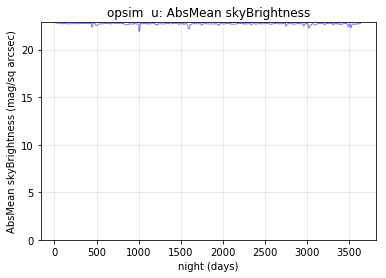

In [61]:
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [84]:
for ifilt in np.arange(Nfilt):
    
    bundlename    = all_bundlename[ifilt]

    
    print(bundles[bundlename].dbCols)
    print(bundles[bundlename].metricValues)
    

{'night', 'skyBrightness'}
None
{'night', 'skyBrightness'}
None
{'night', 'skyBrightness'}
None
{'night', 'skyBrightness'}
None
{'night', 'skyBrightness'}
None
{'night', 'skyBrightness'}
None


In [68]:
for ifilt in np.arange(Nfilt):
    
    bundlename    = all_bundlename[ifilt]

    
    print(bundles[bundlename].dbCols)

    # Let's see what the "pass" metric provided, 
    # looking at the first slicepoint (i.e. our ra/dec value).
    print(bundles[bundlename].metricValues.data[0].dtype.names)
    # And look at some of the values.
    print(bundles[bundlename].metricValues.data[0][0:10])
    # Another way to access just the filter information..
    print(bundles[bundlename].metricValues.data[0]['filter'][0:10])

{'night', 'skyBrightness'}


AttributeError: 'NoneType' object has no attribute 'data'

In [75]:
bundles[bundlename].metricValues.?

AttributeError: 'NoneType' object has no attribute 'all'

In [85]:
file=outDir+'/opsim_AbsMean_skyBrightness_g_ONED.npz'

In [87]:
data=np.load(file)

In [88]:
data